# Определение перспективного тарифа для телеком компании

Цель работы: сделать предварительный анализ тарифов на небольшой выборке клиентов (500 пользователей) и определить кто они, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — **какой тариф лучше** для компании с точки инвестиций маркетингового бюджета.

## План исследования:

1. Изучить исходные данные
2. Подготовить данные для дальнейшей работы
3. Анализ данных
4. Проверка гипотез
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
5. Формирование общего вывода


Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
# импорт всех нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# загрузка данных
calls = pd.read_csv('/datasets/calls.csv', sep=',' )
internet = pd.read_csv('/datasets/internet.csv', sep=',' )
messages = pd.read_csv('/datasets/messages.csv', sep=',' )
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',' )
users = pd.read_csv('/datasets/users.csv', sep=',' )

In [3]:
# Изучение данных с помощью метода info и head

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls содержит информацию о звонках:
 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - user_id — идентификатор пользователя, сделавшего звонок
 
**На первый взгляд с данными всё впорядке.**

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Таблица internet содержит информацию об интернет-сессиях:
 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - user_id — идентификатор пользователя


**Присутствует столбец Unnamed:0 - по всей видимости, это столбец с индексами, также столбец с датой находится в формате object.**

In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages содержит информацию о сообщениях:
 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - user_id — идентификатор пользователя, отправившего сообщение


**Столбец с с датой находится в формате object.**

In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs содержит информацию о тарифах:
 - tariff_name — название тарифа
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета

**На первый взгляд с данными всё впорядке.**

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
#проверка на дубликаты
users[users.duplicated()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


Таблица users содержит информацию о пользователях):
 - user_id — уникальный идентификатор пользователя
 - first_name — имя пользователя
 - last_name — фамилия пользователя
 - age — возраст пользователя (годы)
 - reg_date — дата подключения тарифа (день, месяц, год)
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - city — город проживания пользователя
 - tariff — название тарифного плана


**Есть пропуски в значениях churn_date (это означает, что тариф ещё действовал на момент выгрузки данных). Также столбцы с датами в формате object (churn_date и reg_date). Дубликаты не обнаружены.**

<div class="alert alert-info">
Проверка нулевых значений в данных
</div>

In [15]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [16]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

### Вывод

Я обнаружила, что в нескольких таблицах колонки с датами представлены в некорректном формате (object). Их нужно перевести в формат даты.
<br>В таблице со статистикой использования интернет трафика присутствует столбец Unnamed:0 - по всей видимости, это столбец с индексами, который можно будет удалить.
<br>
В файлах с информацией по звонкам, использованию интернета, сообщениям и пользователям есть данные user_id. По этому значению можно будет найти информацию по использованию услуг связи каждым абонентом. 
<br>
В данных 39613 звонков с длиной 0.0, и 19598 интернет сессий с объёмом 0 Мб. Возможно, так отображаются неотвеченные звонки, когда формально вызов был, но трубку никто не взял, поэтому и длительность 0,0. Нулевые значения в объёме интернет трафика можно обяснить тем, что пользователь пытался выйти в интернет, но были какие-то перебои со связью, поэтому ему не удалось ничего загрузить. Я предлагаю оставить эти значения в данных для дальнейшего анализа.

## Шаг 2. Подготовка данных

In [17]:
# Переведу столбцы с датой в корректный формат

In [18]:
calls = calls.astype({'call_date': 'datetime64[ns]'})
users = users.astype({'churn_date': 'datetime64[ns]'},{'reg_date': 'datetime64[ns]'})
messages = messages.astype({'message_date': 'datetime64[ns]'})
internet = internet.astype({'session_date': 'datetime64[ns]'})

In [19]:
#Удалю столбец c задублировавшимися индексами в таблице по использованию интернета
internet = internet.drop('Unnamed: 0', 1)

In [20]:
#Добавлю колонку месяц
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

<div class="alert alert-info">
Округлю длительность звонков до минуты, т.к. плата сверх тарифа идёт за минуту
</div>

In [21]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [22]:
#создание сводных таблиц и объединение их в одну

In [23]:
calls_count = calls.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
calls_minutes = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'sum')

In [24]:
calls_pivot = calls_count.merge(calls_minutes, on=['user_id','month'])
calls_pivot.rename(columns = {'id':'calls_qty'}, inplace = True)
calls_pivot

calls_qty  duration
user_id month                     
1000    5             22     159.0
        6             43     172.0
        7             47     340.0
        8             52     408.0
        9             58     466.0
...                  ...       ...
1498    10            41     247.0
1499    9              9      70.0
        10            68     449.0
        11            74     612.0
        12            69     492.0

[3174 rows x 2 columns]

In [25]:
msg_count = messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
msg_count.rename(columns = {'id':'message_qty'}, inplace = True)

In [26]:
calls_pivot = calls_pivot.join(msg_count, how = 'outer')

<div class="alert alert-info">
Переведу трафик из мегабайт в гигабайты и округлю до верхнего значения
</div>

In [27]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'] = internet['mb_used']/1024
internet.rename(columns = {'mb_used':'gb_used'}, inplace = True)

In [28]:
internet_count = internet.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')
internet_count

gb_used
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
...                  ...
1498    10     20.121094
1499    9       1.804688
        10     17.391602
        11     17.562500
        12     12.770508

[3203 rows x 1 columns]

In [29]:
calls_pivot = calls_pivot.join(internet_count, how = 'outer')
calls_pivot

calls_qty  duration  message_qty    gb_used
user_id month                                             
1000    5           22.0     159.0         22.0   2.203125
        6           43.0     172.0         60.0  22.711914
        7           47.0     340.0         75.0  13.687500
        8           52.0     408.0         81.0  13.740234
        9           58.0     466.0         57.0  14.239258
...                  ...       ...          ...        ...
1498    10          41.0     247.0         42.0  20.121094
1499    9            9.0      70.0         11.0   1.804688
        10          68.0     449.0         48.0  17.391602
        11          74.0     612.0         59.0  17.562500
        12          69.0     492.0         66.0  12.770508

[3214 rows x 4 columns]

In [30]:
calls_pivot=calls_pivot.reset_index()

In [31]:
calls_pivot

,user_id,month,calls_qty,duration,message_qty,gb_used
0,1000,5,22.0,159.0,22.0,2.203125
1,1000,6,43.0,172.0,60.0,22.711914
2,1000,7,47.0,340.0,75.0,13.687500
3,1000,8,52.0,408.0,81.0,13.740234
4,1000,9,58.0,466.0,57.0,14.239258
...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20.121094
3210,1499,9,9.0,70.0,11.0,1.804688
3211,1499,10,68.0,449.0,48.0,17.391602
3212,1499,11,74.0,612.0,59.0,17.562500


In [32]:
#добавление данных пользователей в объединенную таблицу
calls_pivot = calls_pivot.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
calls_pivot

,user_id,month,calls_qty,duration,message_qty,gb_used,tariff,city
0,1000,5,22.0,159.0,22.0,2.203125,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,22.711914,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,13.687500,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,13.740234,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14.239258,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20.121094,smart,Владикавказ
3210,1499,9,9.0,70.0,11.0,1.804688,smart,Пермь
3211,1499,10,68.0,449.0,48.0,17.391602,smart,Пермь
3212,1499,11,74.0,612.0,59.0,17.562500,smart,Пермь


In [36]:
#пустые значения заполню нулями, т.к. вероятно, что пользователи не пользовались услугой в конкретном месяце
calls_pivot['calls_qty'] = calls_pivot['calls_qty'].fillna(0).astype(int)
calls_pivot['duration'] = calls_pivot['duration'].fillna(0).astype(int)
calls_pivot['message_qty'] = calls_pivot['message_qty'].fillna(0).astype(int)
calls_pivot['gb_used'] = calls_pivot['gb_used'].fillna(0).astype(int)

In [37]:
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id        3214 non-null int64
month          3214 non-null int64
calls_qty      3214 non-null int64
duration       3214 non-null int64
message_qty    3214 non-null int64
gb_used        3214 non-null int64
tariff         3214 non-null object
city           3214 non-null object
dtypes: int64(6), object(2)
memory usage: 226.0+ KB


<div class="alert alert-info">
Перевод данных по включенному интернет трафику в тариф из Мб в Гб.
</div>

In [38]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024
del tariffs['mb_per_month_included']
tariffs

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,500,550,200,3,3,smart,15.0
1,1000,3000,1950,150,1,1,ultra,30.0


In [39]:
# функция расчёта выручки с клиента за месяц
def user_income(data):
    month_income = 0
    if data.loc['tariff'] == 'smart':
        month_income = tariffs.loc[0, 'rub_monthly_fee']
        if data['duration'] > tariffs.loc[0, 'minutes_included']:
            month_income += (data['duration'] - tariffs.loc[0, 'minutes_included'])*tariffs.loc[0, 'rub_per_minute']
        if data['message_qty'] >  tariffs.loc[0, 'messages_included']:
            month_income += (data['message_qty'] - tariffs.loc[0, 'messages_included'])*tariffs.loc[0, 'rub_per_message']
        if data['gb_used'] > tariffs.loc[0, 'gb_per_month_included']:
            month_income += (data['gb_used'] - tariffs.loc[0, 'gb_per_month_included'])*tariffs.loc[0, 'rub_per_gb']
    else:
        month_income = tariffs.loc[1, 'rub_monthly_fee']
        if data['duration'] > tariffs.loc[1, 'minutes_included']:
            month_income += (data['duration'] - tariffs.loc[1, 'minutes_included'])*tariffs.loc[1, 'rub_per_minute'] 
        if data['message_qty'] >  tariffs.loc[1, 'messages_included']:
            month_income += (data['message_qty'] - tariffs.loc[1, 'messages_included'])*tariffs.loc[1, 'rub_per_message']
        if data['gb_used'] > tariffs.loc[1, 'gb_per_month_included']:
            month_income += (data['gb_used'] - tariffs.loc[1, 'gb_per_month_included'])*tariffs.loc[1, 'rub_per_gb']
 
    return month_income

In [40]:
calls_pivot['month_income'] = calls_pivot.apply(user_income, axis=1)

In [41]:
calls_pivot

,user_id,month,calls_qty,duration,message_qty,gb_used,tariff,city,month_income
0,1000,5,22,159,22,2,ultra,Краснодар,1950.0
1,1000,6,43,172,60,22,ultra,Краснодар,1950.0
2,1000,7,47,340,75,13,ultra,Краснодар,1950.0
3,1000,8,52,408,81,13,ultra,Краснодар,1950.0
4,1000,9,58,466,57,14,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,42,20,smart,Владикавказ,1550.0
3210,1499,9,9,70,11,1,smart,Пермь,550.0
3211,1499,10,68,449,48,17,smart,Пермь,950.0
3212,1499,11,74,612,59,17,smart,Пермь,1313.0


### Вывод

Я перевела колонки с датами представленые в некорректном формате (object) в формат даты datetime64[ns].
<br>В таблице со статистикой использования интернет трафика удалила столбец Unnamed:0, в котором были индексы.
<br>

Также я посчитала для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя.

## Шаг 3. Анализ данных

In [42]:
#создание отдельных таблиц по каждому тарифу
smart = calls_pivot.query('tariff == "smart"')[['duration', 'message_qty', 'gb_used' ]]
ultra = calls_pivot.query('tariff == "ultra"')[['duration', 'message_qty', 'gb_used' ]]

In [43]:
#расчёт среднего
print('Среднее количество минут разговора, сообщений и объёма интернет-трафика на тарифе smart.')
smart.mean()

Среднее количество минут разговора, сообщений и объёма интернет-трафика на тарифе smart.


duration       417.934948
message_qty     33.384029
gb_used         15.360700
dtype: float64

In [44]:
print('Среднее количество минут разговора, сообщений и объёма интернет-трафика на тарифе ultra.')
ultra.mean()

Среднее количество минут разговора, сообщений и объёма интернет-трафика на тарифе ultra.


duration       526.623350
message_qty     49.363452
gb_used         18.540102
dtype: float64

In [45]:
#расчёт дисперсии
print('Дисперсия на тарифе smart.')
smart_var = np.var(smart)
smart_var

Дисперсия на тарифе smart.


duration       36203.066652
message_qty      796.455483
gb_used           33.130551
dtype: float64

In [46]:
print('Дисперсия на тарифе ultra.')
ultra_var = np.var(ultra)
ultra_var

Дисперсия на тарифе ultra.


duration       100771.223617
message_qty      2282.946075
gb_used            96.782402
dtype: float64

In [47]:
#расчёт стандартного отклонения
print('Стандартное отклонение на тарифе smart.')
np.sqrt(smart_var)

Стандартное отклонение на тарифе smart.


duration       190.271035
message_qty     28.221543
gb_used          5.755914
dtype: float64

In [48]:
print('Стандартное отклонение на тарифе ultra.')
np.sqrt(ultra_var)

Стандартное отклонение на тарифе ultra.


duration       317.444836
message_qty     47.780185
gb_used          9.837805
dtype: float64

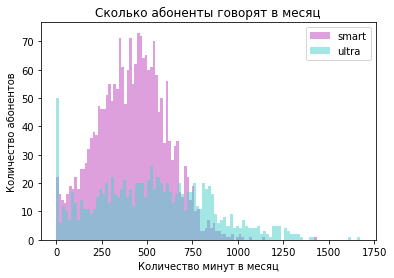

In [49]:
#гистограммы для минут разговора
plt.hist(smart['duration'], bins=100, color = 'plum')
plt.hist(ultra['duration'], alpha = 0.5, bins=100, color = 'mediumturquoise')
plt.xlabel('Количество минут в месяц')
plt.ylabel('Количество абонентов')
plt.title('Сколько абоненты говорят в месяц')
plt.legend(['smart','ultra'])
plt.show()

На гистограмме видно, что пользователи тарифа Smart говорят в среднем около 400 минут и значения равномерно распределены. А среди пользователей тарифа ultra много тех, кто воббще не говорит по телефону (около 50 человек), и также больше людей, кто говорит более 700 минут в месяц.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно, у тебя получился хороший график.
    
Насчет вывода, это не 50 человек, а 50 записей, когда какое-то количество уникальных абонентов не разговаривали по телефону. Потому что в твоем датафрейме каждая строка соответствует месячным тратам одного пользователя.
</div>

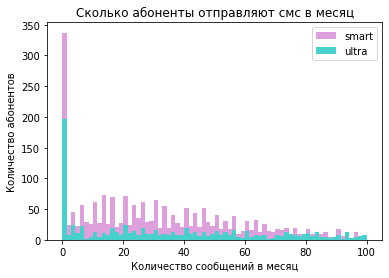

In [50]:
#гистограммы для сообщений
plt.hist(smart['message_qty'], range=(0, 100), bins=70, color = 'plum')
plt.hist(ultra['message_qty'], range=(0, 100), bins=70, color = 'mediumturquoise')
plt.xlabel('Количество сообщений в месяц')
plt.ylabel('Количество абонентов')
plt.title('Сколько абоненты отправляют смс в месяц')
plt.legend(['smart','ultra'])
plt.show()

А вот в количестве SMS есть некоторая закономерность для пользовотелей обоих тарифов - многие из них вообще не отправляют сообщения.

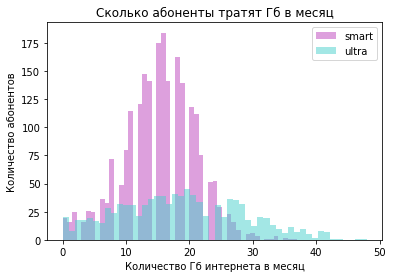

In [51]:
#гистограммы для интернет-трафика
plt.hist(smart['gb_used'], bins=50, color = 'plum')
plt.hist(ultra['gb_used'], alpha = 0.5, bins=50, color = 'mediumturquoise')
plt.xlabel('Количество Гб интернета в месяц')
plt.ylabel('Количество абонентов')
plt.title('Сколько абоненты тратят Гб в месяц')
plt.legend(['smart','ultra'])
plt.show()

Количество использованного трафика абонентами тарифа smart похоже на нормальное распределение, а вот в тарифе ultra не наблюдается такого явново всплеска, значения распределены более равномерно. Абоненты тарифа ultra чаще используют очень большое количесвто интернета (больше 25 Гб в месяц).

### Вывод

Я изучила поведение клиентов оператора, исходя из выборки. 
<br>Ниже представлены средние значения за месяц:

|Тариф|smart|ultra|
|:----|:----|:----|
|Кол-во минут|394|497|
|Кол-во сообщений|33|49|
|Кол-во Гб интернета|15|18.5|

В среднем, пользователи тарифа ultra используют всего больше.
<br>
<br>Я посчитала среднее количество, дисперсию, стандартное отклонение и построила гистограммы. 
С помощью гистограмм удалось сделать следующие выводы:
 - Пользователи тарифа Smart говорят в среднем около 400 минут и значения равномерно распределены. А среди пользователей тарифа ultra много тех, кто вобще не говорит по телефону (около 50 человек), и также больше людей, кто говорит более 700 минут в месяц.
 - В количестве SMS есть некоторая закономерность для пользовотелей обоих тарифов - многие из них вообще не отправляют сообщения.
 - Количество использованного трафика абонентами тарифа smart похоже на нормальное распределение, а вот в тарифе ultra не наблюдается такого явново всплеска, значения распределены равномерно. Абоненты тарифа ultra чаще используют очень большое количесвто интернета (больше 25 Гб в месяц).

## Шаг 4. Проверка гипотез

In [52]:
#создание двух выборок с выручкой за месяц по тарифам
smart_income = calls_pivot.query('tariff == "smart"')['month_income']
ultra_income = calls_pivot.query('tariff == "ultra"')['month_income']

<div class="alert alert-info">
Нулевая гипотеза H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
<br>Альтернативная гипотеза H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
</div>

In [53]:
alpha = 0.05
results1 = st.ttest_ind(smart_income, ultra_income)
print('p-значение:', results1.pvalue)
if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 7.304764020044488e-223
Отвергаем нулевую гипотезу


In [54]:
smart_income.describe()

count    2229.000000
mean     1177.277254
std       760.340315
min       550.000000
25%       550.000000
50%       919.000000
75%      1550.000000
max      6570.000000
Name: month_income, dtype: float64

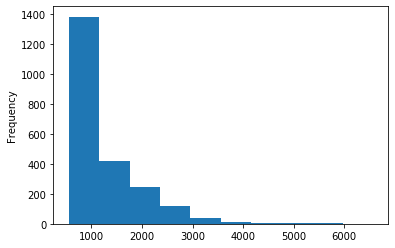

In [55]:
smart_income.plot.hist();

In [56]:
smart_income.sum()

2624151.0

Многие абоненты тарифа smart платят только абонентскую плату. Около половины пользователей превышает лимит.

In [57]:
ultra_income.describe()

count     985.000000
mean     2050.659898
std       338.714798
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4650.000000
Name: month_income, dtype: float64

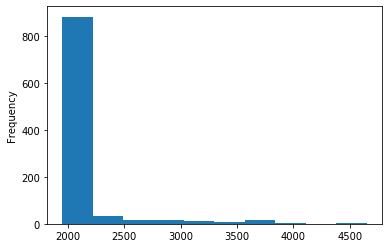

In [58]:
ultra_income.plot.hist();

In [59]:
ultra_income.sum()

2019900.0

Большинство пользователей тарифа ultra, платят только абнентскую плату, но есть и те, кому не хватает включенных услуг и они платят сверх лимита.

In [60]:
#создание двух выборок с выручкой за месяц пользователей из Москвы и из других регионов
msc_income = calls_pivot.query('city == "Москва"')['month_income']
other_income = calls_pivot.query('city != "Москва"')['month_income']

<div class="alert alert-info">
Нулевая гипотеза H₀: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
<br>Альтернативная гипотеза H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
</div>

In [61]:
alpha = 0.05
results2 = st.ttest_ind(msc_income, other_income)
print('p-значение:', results2.pvalue)
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.3729729010391226
Не получилось отвергнуть нулевую гипотезу


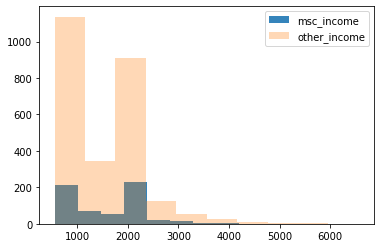

In [62]:
plt.hist(msc_income, alpha=0.9, label='msc_income')
plt.hist(other_income, alpha=0.3, label='other_income')
plt.legend(loc='upper right')
plt.show()

### Вывод

Были выдвинуты две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
2. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам я применила метод scipy.stats.ttest_ind.

Критический уровень статистической значимости - 0.05

Гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна, я отвергла, т.к. p-значение ниже критического уровня статистической значимости (0.05). Это означает, что **средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**. p-значение равно 0, т.к. все пользователи тарифа ultra платят ровно сумму абонентской платы.

Гипотезу, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, не получилось отвергнуть, т.к. p-значение выше критического уровня статистической значимости (0.05). Это означает, что с вероятностью около 28% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между выручкой от пользователей из Москвы и других регионов.


## Шаг 5. Общий вывод

В данной работе я изучила и обработала данные, перевела в корректный формат, исправила ошибки и проверила их на дубликаты.
Также я посчитала дополнительные параметры для дальнейшего исследования:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя.
 

С помощью исследовательского анализа данных **удалось выяснить** среднее количество используемых услуг абонентом в месяц:

|Тариф|smart|ultra|
|:----|:----|:----|
|Кол-во минут|394|497|
|Кол-во сообщений|33|49|
|Кол-во Гб интернета|15|18.5|

С помощью гистограмм удалось сделать следующие выводы:
 - Пользователи тарифа Smart говорят в среднем около 400 минут и значения равномерно распределены. А среди пользователей тарифа ultra много тех, кто вобще не говорит по телефону (около 50 человек), и также больше людей, кто говорит более 700 минут в месяц.
 - В количестве SMS есть некоторая закономерность для пользовотелей обоих тарифов - многие из них вообще не отправляют сообщения.
 - Количество использованного трафика абонентами тарифа smart похоже на нормальное распределение, а вот в тарифе ultra не наблюдается такого явново всплеска, значения распределены равномерно. Абоненты тарифа ultra чаще используют очень большое количесвто интернета (больше 25 Гб в месяц).

Гипотеза, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна, **была отклонена**.
Гипотеза, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, **была отклонена**.

Хоть абонентская плата по тарифу ultra и больше изначально, чем в тарифе smart, в итоге, абоненты тарифа smart чаще выходят за лимиты и платят сверх тарифа. А так как количество абонентов smart в выборке было в два раза больше, они в сумме принесли больше денег, чем абоненты тарифа ultra. **Выгоднее продвигать тариф smart.**
Я бы рекомендовала оценить затраты на предоставление услуг, чтобы посчитать маржинальность по каждому тарифу.
